# Preparing basic knowledge for Classification

The code below is using Python with the Pandas and Scikit-learn libraries to create a word matrix from a list of strings.

# Exercise - Part 4.1 - Develop the text classification model for the traffic sentiment analysis

The following code is utilized for traffic sentiment analysis and employs the Pakistani Traffic Sentiment Analysis dataset as an illustrative example. This dataset comprises two columns: 'Text' and 'Sentiment.' The 'Text' column encompasses sentiments related to Pakistani traffic, encompassing both positive and negative reviews. The 'Sentiment' column is employed to categorize each sentiment, with positive reviews labeled as '0' and negative reviews as '1'.

As discussed in the lecture, the sentiment analysis is modeled as a binary classification problem. The task will use the Logistic Regression as the classification model and guide you through the step-by-step process of the whole process of the model development for the traffic sentiment analysis.   

Load the dataset:

In [ ]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


Using the wordcloud to visualize the dataset



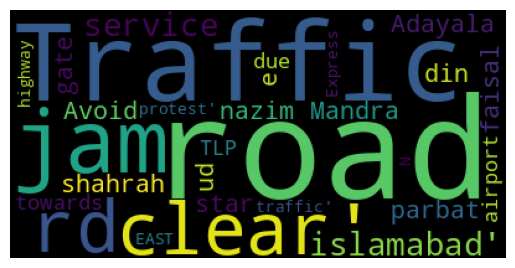

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Print a brief summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


Use the following statement to see how many instances there are of each class (0 for positive and 1 for negative):

In [ ]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

There is an even number of positive and negative samples, but in each case, the number of unique samples is less than the number of samples for that class. That means the dataset has duplicate rows, and duplicate rows could bias a machine learning model. Use the following statements to delete the duplicate rows and check for balance again:

In [ ]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

Now there are no duplicate rows, and the number of positive and negative samples is roughly equal.

Next, use CountVectorizer to prepare and vectorize the text in the Text column:

In [ ]:
# Convert the text to vectorizer
x = df['Text']

# Obtain the label
y = df['Sentiment']

Now split the dataset for training and testing. We’ll use a 80/20 split since there are almost 2,000 samples in total:

In [ ]:
from sklearn.model_selection import train_test_split

# Splite the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer instance, the ngram_range represents the length range
# of phrase segmentation,the stop_words parameter is set to "english" to remove
# common English stop words like "and", "the", and "a", min_df is to serve as a
# threshold to delete some words which have a frequency lower then min_df.
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

The tasks for this part is use the grid search to:
1. Identify which vectorization method works the best or basically not much difference.
2. Identify which model, together with its corresponding hyperparameters, gives the best performance for traffic sentimental analysis.

You can either use the structure below or be a be a bit more explorative and try out other strategies we have discussed in the lecture/exercises to find the best parameters/model (e.g., Random Search, ROC curve,...).

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
#(1) CountVectorizer
vectorizer1 = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer2 = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
vectorizer3 = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )
vect = [vectorizer1, vectorizer2, vectorizer3]
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR
model1 = LogisticRegression(max_iter=1000, random_state=0)
param_grid1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

#(2)KNN
model2=KNeighborsClassifier()
param_grid2 = {
     'n_neighbors': [3, 5, 7, 9],
     'weights': ['uniform', 'distance']
}

#(3)RF
model3 = RandomForestClassifier(random_state=0)
param_grid3 = {
     'n_estimators': [100, 200, 300],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

#(4)XGBoost
model4 =  XGBClassifier()
param_grid4 = {
     'learning_rate': [0.01, 0.1, 0.2],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5]
 }


#(5)SVM
model5= SVC(probability=True)

# this is an example to use the grid search to find the best parameter for SVM model
# param_grid specifies the hyperparameter grid to search over： kernel types
# ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
param_grid5 = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}
#(6)Naïve Bayes models
model6=BernoulliNB()
param_grid6 = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}
models = [model1, model2, model3, model4, model5, model6]
param_grids = [param_grid1, param_grid2, param_grid3, param_grid4, param_grid5, param_grid6]
accur = [0,0,0]
for i in range(len(vect)):
  for j in range(len(models)):
    vectorizer = vect[i]
    model = models[j]
    param_grid = param_grids[j]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    #`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
    x_train_vectorized = vectorizer.fit_transform(x_train)
    x_test_vectorized = vectorizer.transform(x_test)
    #`fit` method fits the model to the training data, systematically trying out all
    # parameter combinations.
    print("grid")
    grid_search.fit(x_train_vectorized, y_train)

    #`best_params` and `best_score` store the best hyperparameters and their
    # corresponding accuracy score.
    best_params = grid_search.best_params_
    print(best_params)
    best_score = grid_search.best_score_

    #The `model` is updated with the best estimator found during the grid search,
    # which can be used for further analysis.
    model = grid_search.best_estimator_
    acc = accuracy_score(y_test,model.predict(x_test_vectorized))
    print(acc)
    if acc > accur[0]:
      accur[0] = acc
      accur[1] = i
      accur[2] = j
print(accur)


grid
{'C': 1}
0.937799043062201
grid
{'n_neighbors': 5, 'weights': 'uniform'}
0.9473684210526315
grid
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.9641148325358851
grid
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
0.9593301435406698
grid
{'C': 10, 'kernel': 'rbf'}
0.9569377990430622
grid
{'alpha': 1, 'force_alpha': True}
0.9425837320574163
grid
{'C': 10}
0.9521531100478469
grid
{'n_neighbors': 9, 'weights': 'uniform'}
0.9545454545454546
grid
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
0.9712918660287081
grid
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
0.9712918660287081
grid
{'C': 10, 'kernel': 'rbf'}
0.9712918660287081
grid
{'alpha': 1, 'force_alpha': True}
0.8349282296650717
grid
{'C': 0.1}
0.9545454545454546
grid
{'n_neighbors': 5, 'weights': 'distance'}
0.9330143540669856
grid
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
The accuracy of the model is: 0.9712918660287081


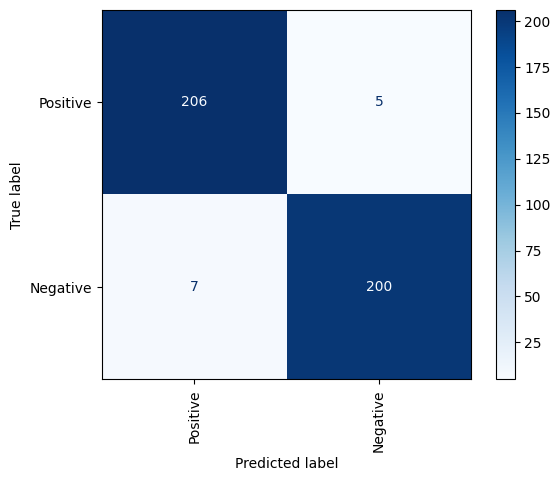

In [ ]:
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)
model = RandomForestClassifier(random_state=0)
param_grid = {
     'n_estimators': [100, 200, 300],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_

model.fit(x_train_vectorized, y_train)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))
cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )


In [ ]:
# Here you change the reviews
text = 'Adayala road has good flow'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]
print(score)
if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

0.7052085807481039
The prediction result of this review is: negative
